## Age Detection

__Dataset__ : The dataset consists of images(feature) of indian actors and their age(label) as label. And here we're gonna predict age of an actor from his/her image. For this purpose we're gonna use keras, pandas, numpy and convolutional neural network. Indian Movie Face database (IMFDB) is a large unconstrained face database consisting of 34512 images of 100 Indian actors collected from more than 100 videos. All the images are manually selected and cropped from the video frames resulting in a high degree of variability in terms of scale, pose, expression, illumination, age, resolution, occlusion, and makeup.

## <b>Step 1 </b>: Import all the required libraries 

<b>We are going to use following libraries::</b>

* __1. Pandas__  --> To import dataset in the form of dataframe
* __2. Numpy__ --> To easily handel complex computations
* __3. Sklearn__ --> To easily handel machine learning operations
* __4. Keras__ --> To easily implement comvolutional neural network
* __5. Pickle__ --> To save our model
* __6. Seaborn__ --> For ploting 

In [124]:
import keras
from sklearn import * 
import pandas as pd
import numpy as np
import pickle
from PIL import Image 
import IPython # To display images
import seaborn
import warnings
warnings.filterwarnings('ignore')
import os.path
import texttable as tt # To display data in the form of table

## <b>Step 2 </b> : Extract all the required data and combine it

Set path to extract iamges and store them into a list 'images'.

1. __Images__ : This is the food for our model. It contains the images we’re going to use to teach our model.

2. __img_name_with_Label.csv__ : This contains the labels for the images in Images dataset, i.e., if the person in the image is young, middle aged or old.

Combine the training and testing datasets in the form of an array to teach our model what a young, middle aged and old person looks like.

Import the CVS file containing name of the images and its labels (age).

In [2]:
try:
    data_labels = pd.read_csv('Data/img_name_with_Label.csv')
except FileNotFoundError:
    print("File does not exist!")

In [3]:
print("Disply top 5 observations in img_name_with_Label.csv file : \n", data_labels.head())

Disply top 5 observations in img_name_with_Label.csv file : 
           ID   Class
0    377.jpg  MIDDLE
1  17814.jpg   YOUNG
2  21283.jpg  MIDDLE
3  16496.jpg   YOUNG
4   4487.jpg  MIDDLE


Here we can see that labels are categorised into 3 groups
* OLD
* MIDDLE 
* YOUNG

In [4]:
data_labels['Class'].unique()

array(['MIDDLE', 'YOUNG', 'OLD'], dtype=object)

Here we can see the distrbution of the data

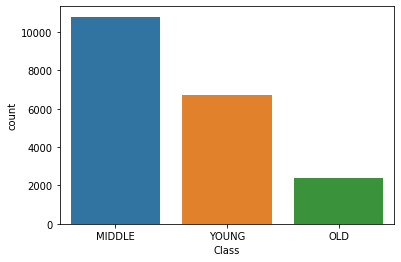

In [5]:
seaborn.countplot(data_labels.Class, data = data_labels)

Data_combiner will -
* __Resize the images__  
* __assign proper label to the array form of an image__ 

return feature and label in the form of array.

Size of image affects the computation time. So to reduce the computation time, we'll need to reduce the size of image.  

In [6]:
path = "Data/Images/"
features=[]
size = 10
image_name = data_labels['ID'].values[:size]
for i in range(len(image_name)):
    img = Image.open(path+image_name[i]) # Load image
    resize_img = img.resize((64,64))  # Resize each image as 64x64
    np_image = np.asarray(resize_img, dtype='int32') # Convert each image into a numpy array
    features.append(np_image) 
    
features = np.array(features)
labels = data_labels['Class'][:size]

In [65]:
(pd.DataFrame([features, labels], index = ['image', 'age']).T).to_csv('CSVs/01_new_data.csv')

We can't see the values of an entire matrix, but by looking at its shape, we decide if we going in a right direction or not. By using ".shape" we can see shape of matrix.

In [8]:
features.shape, labels.shape

((10, 64, 64, 3), (10,))

- features vector contains 4-D matrix, where 
    - 19906 : Number of observations in dataset
    - 64, 64 : size of each image
    - 3 : RGB image, hence 3 Dimensions
    
- labels vector is a 1-D matrix with 19906 observations and 1 column.

## Step 3 : Data Preprocessing

- Here labels are in text form, so we need to convert them to numerical form. 
- Using label encoder we give random unique id to each unique value, i.e., here we have 3 unique values : 
    - Young  --> 2
    - Middle --> 0
    - Old    --> 1
- As our labels are in categorical form we need to apply one hot encoding on it, so that it'll get converted into numerical form. 
- For this we'll have to convert string data into numerical format by assigning numerical value to each unique element, because sklearn supports one hot encoding only for data in numerical format. 

In [111]:
import sklearn.preprocessing
le = sklearn.preprocessing.LabelEncoder()

- __Fit__ : Fitting finds the internal parameters of a model that will be used to transform data. Transforming applies the parameters to data. 

In [112]:
le.fit(labels)

LabelEncoder()

- __Transform__ : Here we have applied label encoder to assign unique id to each unique label

In [113]:
encoded_labels = le.transform(labels)

In [114]:
print("Original labels : ",labels[:10])
print("Changed labels : ",_labels[:10])

Original labels :  0    MIDDLE
1     YOUNG
2    MIDDLE
3     YOUNG
4    MIDDLE
5    MIDDLE
6     YOUNG
7     YOUNG
8     YOUNG
9       OLD
Name: Class, dtype: object
Changed labels :  [0 2 0 2 0 0 2 2 2 1]


If we use such different random numbers to represent the data, our model might interprit in wrong, and won't perform well. Therefore, after label encoder, we have one more step where we'll convert whole data in the form of 0 and 1.
-  In this step we'll put for presence of the value and 0 for other values as given below.

In [115]:
categorical_labels = keras.utils.np_utils.to_categorical(_labels)

In [116]:
print("Original labels from the data :\n", labels[5:10])
print("=" * 60)
print("After applying label encoder : \n", encoded_labels[5:10])
print("=" * 60)
print("After converting to categorical data : \n ", categorical_labels[5:10])

Original labels from the data :
 5    MIDDLE
6     YOUNG
7     YOUNG
8     YOUNG
9       OLD
Name: Class, dtype: object
After applying label encoder : 
 [0 2 2 2 1]
After converting to categorical data : 
  [[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [123]:
save_data = [labels, encoded_labels, categorical_labels[::,0], categorical_labels[::,1], categorical_labels[::,2]]
encoded_df = pd.DataFrame(save_data, index=  ["original", "encoded_labels", 'MIDDLE', 'OLD', 'YOUNG']).T
encoded_df.to_csv('02_encoded_labels.csv')

In first row, value is MIDDLE, so we put 1 for MIDDLE and 0 for other two.

## Step 4 :  Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on test dataset and find out how accurate are its predictions.
- Here we are spliting the data so that train dataset contains 80% of the data and test dataset contains 20% of the total data.
- Here we are using train_test_split method from sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size : Here we specify the size we want for our test dataset.
- random_state : When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [15]:
feature_train, feature_test, label_train, label_test = sklearn.model_selection.train_test_split(features, encoded_labels, 
                                                                                                test_size = 0.20, 
                                                                                                random_state = 42)

In [106]:
def display_shapes():
    tab = tt.Texttable()
    headings = ['Name','Shape']
    variable_names = ['feature_train', 'label_train', 'feature_test', 'label_test']
    tab.header(headings)

    for name in variable_names:
        tab.add_row([name, eval(name).shape])
    return print(tab.draw())

display_shapes()

+---------------+----------------+
|     Name      |     Shape      |
+===============+================+
| feature_train | (2, 64, 64, 3) |
+---------------+----------------+
| label_train   | (2, 64, 64, 3) |
+---------------+----------------+
| feature_test  | (2, 64, 64, 3) |
+---------------+----------------+
| label_test    | (2, 64, 64, 3) |
+---------------+----------------+


## Step 5 : Define the structure of neural network

- Artificial neural networks or connectionist systems are computing systems that are inspired by, but not identical to, biological neural networks that constitute animal brains. Such systems "learn" to perform tasks by considering examples, generally without being programmed with task-specific rules.
- Neural network consists of 3 parts:
    - Input Layer
    - Hidden Layer of neurons
    - The output layer (a.k.a. the prediction)
- The arrows that connect the dots shows how all the neurons are interconnected and how data   travels from the input layer all the way through to the output layer.

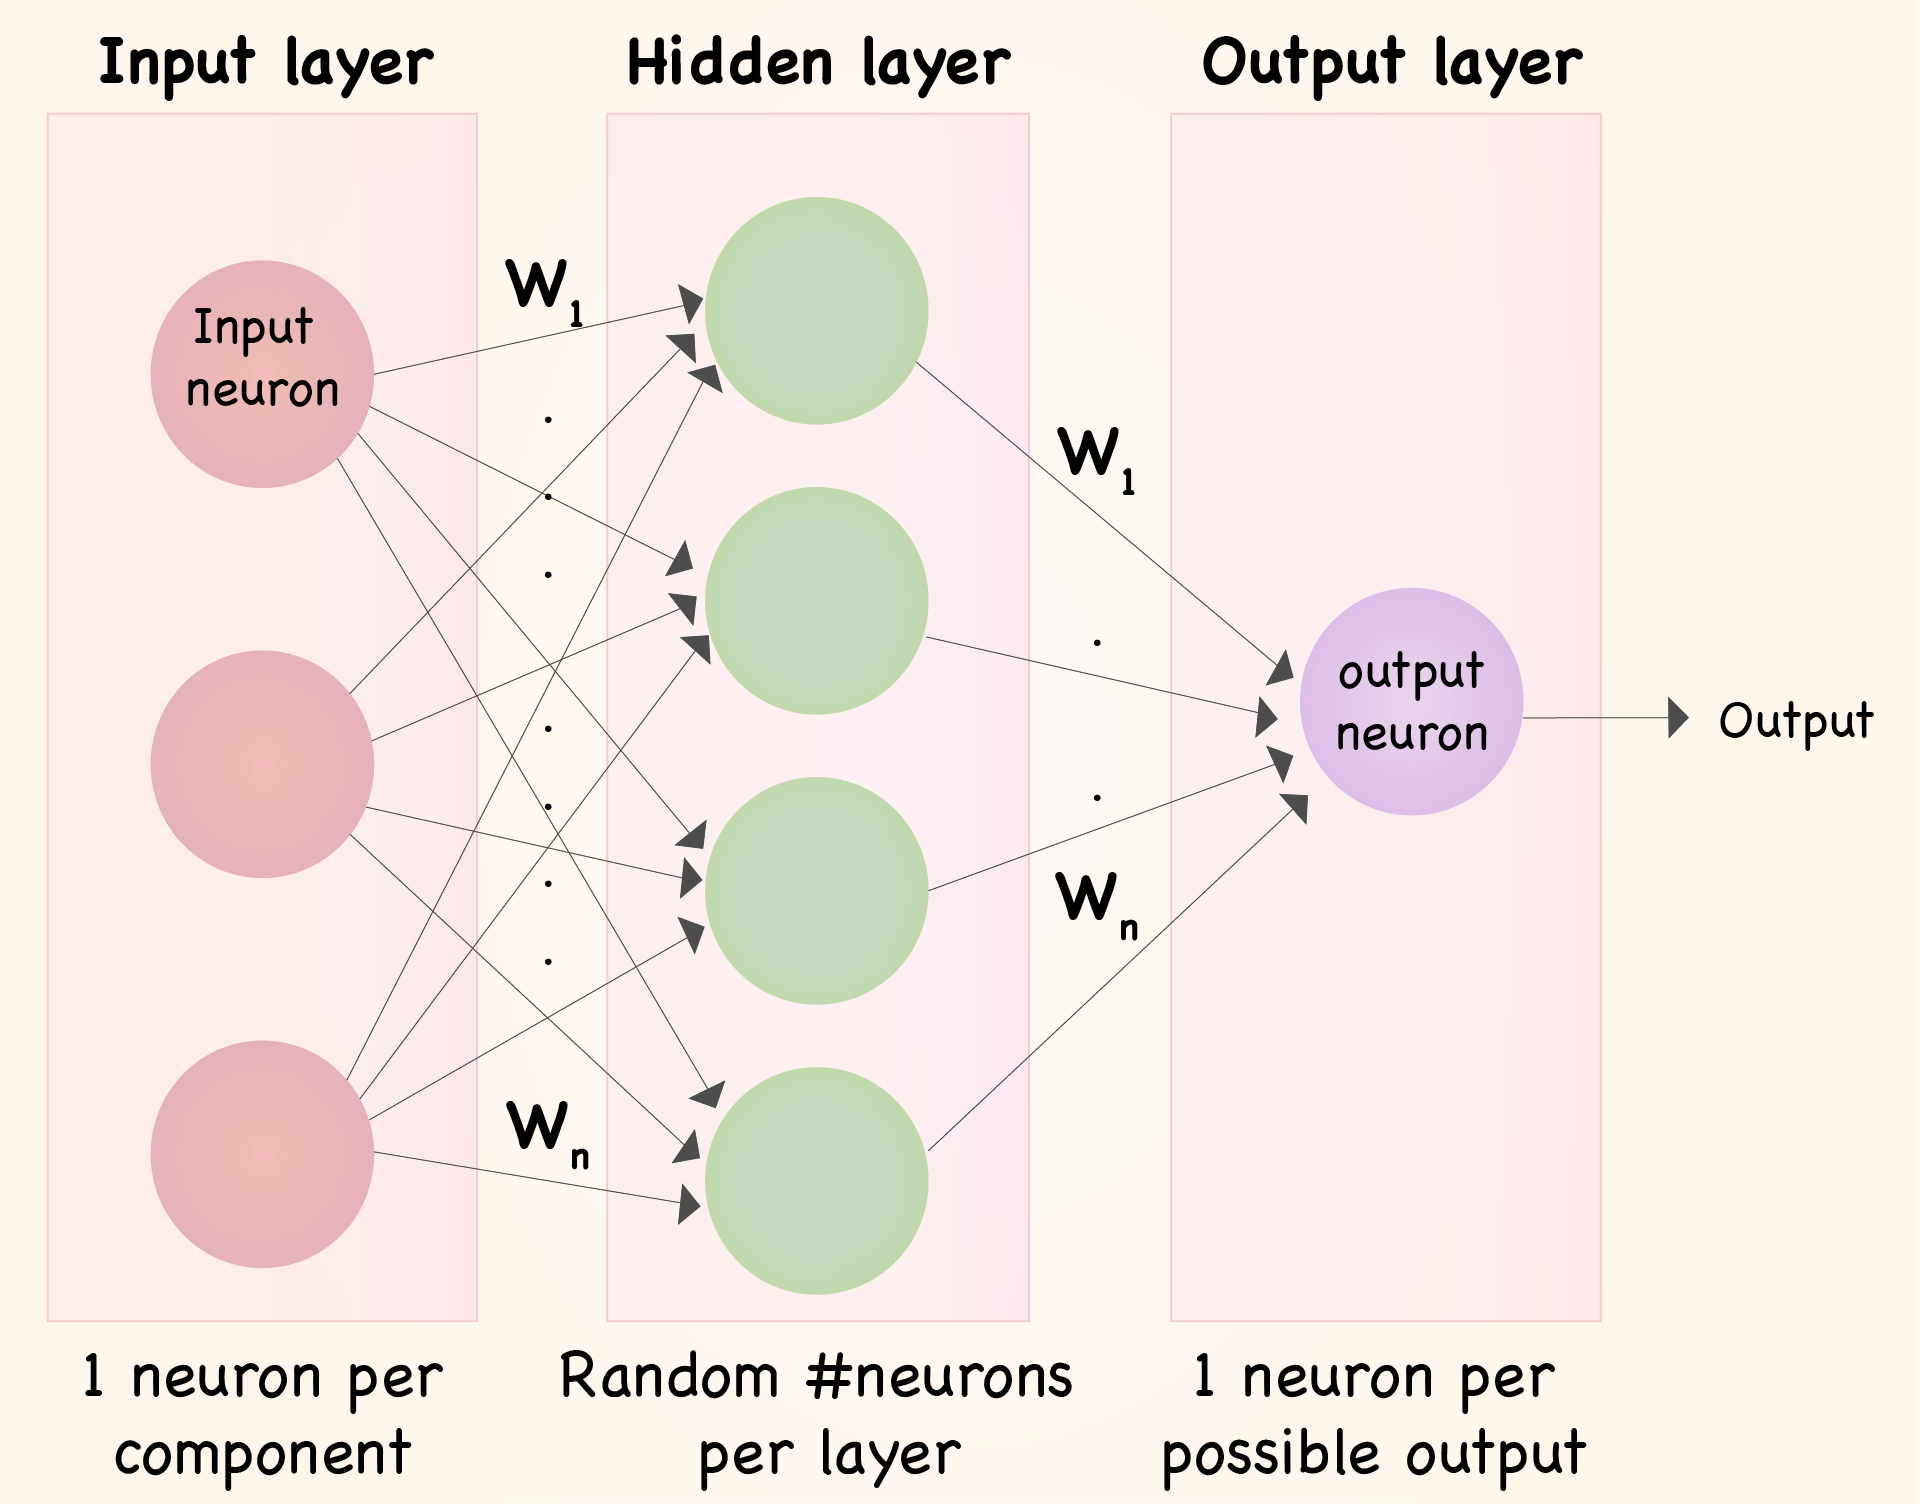

In [75]:
import IPython
IPython.display.Image("imgs_for_code/neural_network.png")

- Input Layer : It contains the input for our neural network
- Hodden Layer : It is in the hidden layers where all the processing actually happens through a system of connections characterized by weights and biases (commonly referred as W and b): the input is received, the neuron calculate a weighted sum adding also the bias and according to the result and a pre-set activation function. Afterwards, the neuron transmit the information downstream to other connected neurons in a process called ‘forward pass’. At the end of this process, the last hidden layer is linked to the output layer which has one neuron for each possible desired output.
- Output Layer : It gives us the output for our neural network.

The Sequential model is a linear stack of layers.

Create an object ( 'clasifier' ) of Sequential model from sklearn 

In [18]:
classifier = keras.models.Sequential()

Add layers to the neural network using .add method

The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape

### __convolutional layer__:
A convolutional layer that extracts features from a source image. Convolution helps with blurring, sharpening, edge detection, noise reduction, or other operations that can help the machine to learn specific characteristics of an image.

### __MaxPooling2D__
- A pooling layer that reduces the image dimensionality without losing important features or patterns.
- The max pooling is saying, if the feature is detected anywhere in this filter then keep a high number. But the main reason why people are using pooling because its works well in practice and reduce computations.

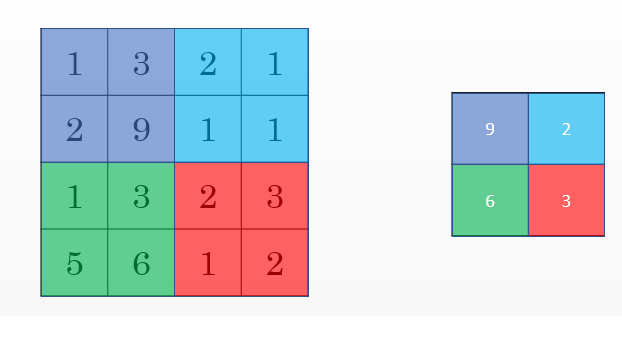

In [19]:
IPython.display.Image("imgs_for_code/pooling.png")

### __Flatten__
- In flatten we combine all the data to form a single array. And then we feed it to neural netword.
- Here we are arranging each roe over another to convert the matrix into array

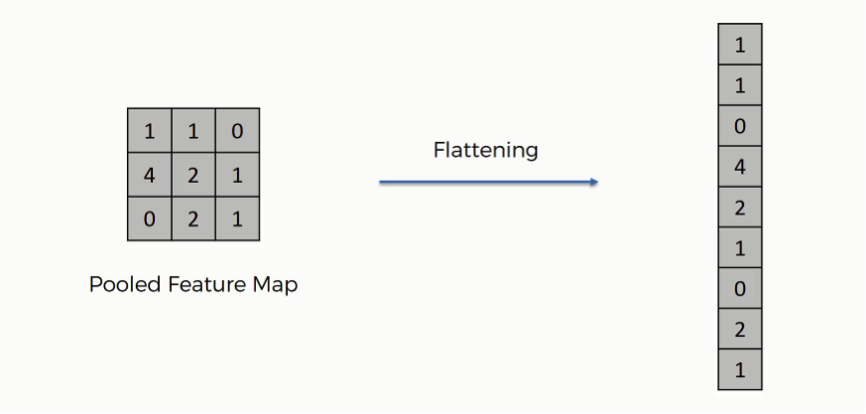

In [20]:
IPython.display.Image("imgs_for_code/flatten.png")

### __Dense__:
- A fully connected layer also known as the dense layer, in which the results of the convolutional layers are fed through one or more neural layers to generate a prediction.
- In simple words a dense layer is where each unit or neuron is connected to each neuron in the next layer.

### Activation Function : 
- It is a function that you use to get the output of node. It is also known as Transfer Function.
- Their main purpose is to convert a input signal of a node in a A-NN to an output signal.
- It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).
- There are many activation function : 
#### 1. Sigmoid or Logistic Activation Function:
    - The Sigmoid Function curve looks like a S-shape.
    - The main reason why we use sigmoid function is because it exists between (0 to 1).
    - Therefore, it is especially used for models where we have to predict the probability as an output.
    - Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.
    - The softmax function is a more generalized logistic activation function which is used for multiclass classification.

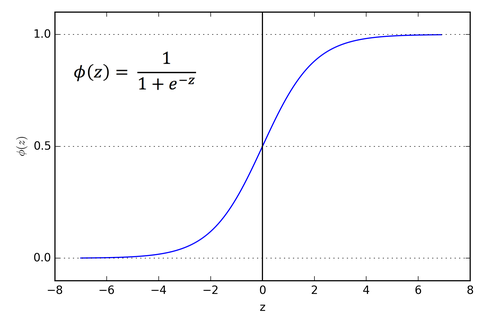

In [21]:
IPython.display.Image("imgs_for_code/sigmoid.png")

#### 2. Tanh or hyperbolic tangent Activation Function
- tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).
- The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

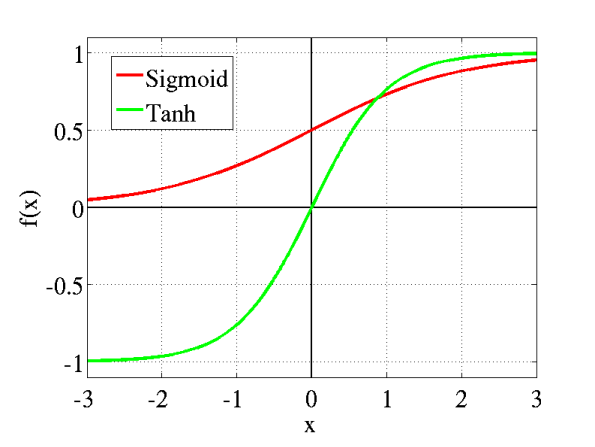

In [22]:
IPython.display.Image("imgs_for_code/tanh.png")

#### 3. ReLU (Rectified Linear Unit) Activation Function
- The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.
- Here range is [ 0 to infinity)
- As you can see, the ReLU is half rectified (from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.
- But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. 
- That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

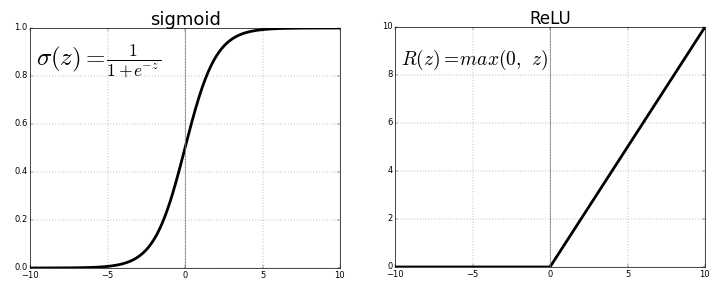

In [23]:
IPython.display.Image("imgs_for_code/relu.png")

#### 4. Leaky ReLU
- It is an attempt to solve the dying ReLU problem
- The leak helps to increase the range of the ReLU function. Usually, the value of a is 0.01 or so.
- When a is not 0.01 then it is called Randomized ReLU.
- Therefore the range of the Leaky ReLU is (-infinity to infinity).

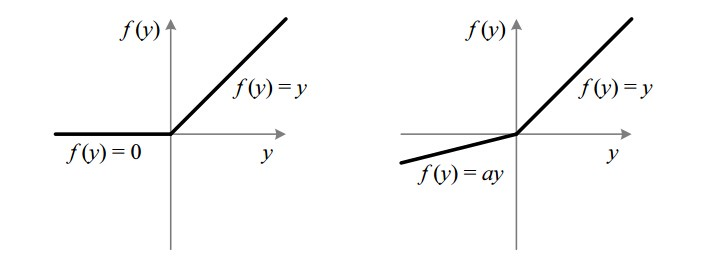

In [24]:
IPython.display.Image("imgs_for_code/leky_relu.jpeg")

Below are the layers we are going to use for our neural network. 
### __Input Layer :__ 
- Layer_1 : This is a convoluton layer where we are going to provide image with input shape (64 x 64 x 3) and relu activation unit with filter of size (32 x 3 x 3). 
- Layer 2 : This is maxpool layer with size of max pooling window as (2 x 2).
- Layer 3 : It is same as layer 1 but here we don't have to give shape of input data explicitly.
- Layer 4 : It is maxpool layer with size of max pooling window as (2 x 2).
- Layer 5 : Flatten layer combine all the data to form a single array.

In [25]:
classifier.add(keras.layers.Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier.add(keras.layers.Convolution2D(32,3,3, activation='relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier.add(keras.layers.Flatten())

### __Hidden Layers__ : 
- Dense layer is nothing but hidden layer in our neural network.
- Here we are using activatio function as relu and 

In [34]:
classifier.add(keras.layers.Dense(activation='relu', output_dim = 100))
classifier.add(keras.layers.Dense(output_dim = 3, activation='softmax'))

Before training a model, you need to configure the learning process, which is done via compile method

- Summary will show the shape of data in each layer.

In [35]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               627300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)              

## Step 6 : Train Model using neural network

- Configures the model for training.
- metrics: List of metrics to be evaluated by the model during training and testing. 
- loss : It is a loss function. If the model has multiple outputs, you can use a different loss on each output by passing a dictionary or a list of losses. The loss value that will be minimized by the model will then be the sum of all individual losses.
- # __optimizer : CHECK __ : 

In [36]:
classifier.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam')

In [71]:
# classifier.get_weights()[4]
# classifier.get_weights()[0].shape

ImageDataGenerator used for augmentation of images according to parameters. Image augmentation is artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

In [38]:
train_generator = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    zoom_range=0.3,
    shear_range=0.3,
    rescale=1.0/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

255 is the maximin pixel value. Rescale 1./255 is to transform every pixel value from range [0,255] -> [0,1]. 

In [39]:
val_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

Now we'll apply the neural network we have created to our data.
- fit_generator will load the data into RAM and perform training on batches that we have provided as parameters.
- steps_per_epoch : Number of observations to use in each epoch for training.
- Epochs : Number of iterations.
- validation_data : Test dataset for testing the model.
- validation_steps : Number of observations to use in each epoch for testing.

In [41]:
history = classifier.fit_generator(train_generator.flow(feature_train,label_train,batch_size=5)
                        , steps_per_epoch=len(feature_train)
                        , epochs=1
                        ,validation_data=val_generator.flow(feature_test,label_test,batch_size=5)
                        ,validation_steps=len(feature_test))

Epoch 1/1
8/8 [==============================] - 1s 77ms/step - loss: 0.6320 - accuracy: 0.6667 - val_loss: 0.4864 - val_accuracy: 0.6667


Returns the loss value & metrics values for the model in test mode.

In [42]:
classifier.evaluate(feature_test ,label_test)

2/2 [==============================] - 0s 8ms/step


[0.0, 1.0]

## Step 7: Save the model in pickle file

As logistic_model_cv gave us highest accuracy we'll go with it and save it to pickle file.
We save our model to pickle file so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream.  

In [49]:
with open('model.pkl','wb') as f:
    pickle.dump(classifier,f)

In [50]:
with open('model.pkl', 'rb') as file:
    model = file.read()